# Predicting Fraudulent Transactions Using Neural Networks

Now that you’ve learned how to build a deep neural network, you’ll apply those skills to create a deep learning model that can predict financial fraud. But in this activity, rather than a regression deep learning model, you will create a classification deep learning model.

## Instructions:

### Load and Preprocess the Data

1. Read the data from the CSV file into a Pandas DataFrame.

2. Create the target set `y` by assigning the values of the “isFraud” column of the DataFrame.

3. Define the features set `X` by including all of the columns of the DataFrame except for the “isFraud” column.

4. Create the training and testing sets using the `train_test_split` function from scikit-learn.

5. Scale the features data using the `StandardScaler` from scikit-learn.

### Create and Evaluate a Deep Neural Network Model

1. Create a deep neural network model with the following structure:

    * 9 inputs
    * First hidden layer with 18 neurons
    * Second hidden layer with 8 neurons
    * Output layer with a single output
    * Hidden layers use the ReLU activation function, and output layer uses the sigmoid activation function

2. Display the model structure using the 'summary` function.

3. Compile the neural network model using the `binary_crossentropy` loss function, the `adam` optimizer, and `accuracy` as an additional metric.

4. Fit the model with the training data, using 100 epochs.

5. Evaluate the model using testing data and the `evaluate` method.


## References:

[Keras Sequential model](https://keras.io/api/models/sequential/)

[Keras Dense module](https://keras.io/api/layers/core_layers/dense/)

[Keras evaluate](https://keras.io/api/models/model_training_apis/)

In [15]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Load and Preprocess the Data

### Step 1: Read the data from the CSV file into a Pandas DataFrame.

In [16]:
# Read the credit_card_transactions.csv file from the Resources folder into a Pandas DataFrame
cc_transactions_df = pd.read_csv(
    Path('../Resources/credit_card_transactions.csv')
)

# Review the DataFrame
cc_transactions_df.head()


,dateMonth,dateWeekday,dateQuarter,operationType,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,1,4,736.76,1120.00,383.24,0.00,0.00,0
1,1,1,1,2,256226.20,0.00,0.00,518041.64,1305828.01,0
2,1,1,1,5,310027.49,61594.00,0.00,10089.00,1157398.83,0
3,1,1,1,1,76695.35,9064440.33,9141135.68,880045.33,206147.08,0
4,1,1,1,4,4761.57,0.00,0.00,0.00,0.00,0


### Step 2: Create the target set `y` by assigning the values of the “isFraud” column of the DataFrame.

In [17]:
# Define the target set by selecting the isFraud column
y = cc_transactions_df.isFraud

# Display a sample of y
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

### Step 3: Define the features set `X` by including all of the columns of the DataFrame except for the “isFraud” column.

In [18]:
# Define features set X by selecting all columns but the isFraud
X = cc_transactions_df.drop(columns = 'isFraud').copy()

# Display the features DataFrame
X.head()


,dateMonth,dateWeekday,dateQuarter,operationType,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,1,1,4,736.76,1120.00,383.24,0.00,0.00
1,1,1,1,2,256226.20,0.00,0.00,518041.64,1305828.01
2,1,1,1,5,310027.49,61594.00,0.00,10089.00,1157398.83
3,1,1,1,1,76695.35,9064440.33,9141135.68,880045.33,206147.08
4,1,1,1,4,4761.57,0.00,0.00,0.00,0.00


### Step 4: Create the training and testing sets using the `train_test_split` function from scikit-learn.

In [19]:
# Create training and testing datasets using train_teat_split
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)


### Step 5:  Scale the features data using the `StandardScaler` from scikit-learn.

In [20]:
# Create the StandardScaler instance
X_scaler = StandardScaler() 

In [21]:
# Fit the scaler to the features training dataset
X_scaler.fit(X)


StandardScaler()

In [22]:
# Scale both the training and testing data from the features dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


---

## Create and Evaluate a Deep Neural Network Model

### Step 1: Create a deep neural network model with the following structure:

    * 9 inputs
    * First hidden layer with 18 neurons
    * Second hidden layer with 8 neurons
    * Output layer with a single output
    * Hidden layers use the ReLU activation function, and output layer uses the sigmoid activation function


In [23]:
# Define the the number of inputs to the model
number_inputs = 9

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = 18

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = 8

# Create the Sequential model instance
nn = Sequential()

# Add the first Dense layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_inputs, activation="relu"))

# Add the second Dense layer specifying the number of hidden nodes and the activation function
nn.add(Dense(units=hidden_nodes_layer2, input_dim=number_inputs, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(1, activation="sigmoid"))

### Step 2. Display the model structure using the `summary` function.

In [24]:
# Display the Sequential model summary
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 18)                180       
                                                                 
 dense_4 (Dense)             (None, 8)                 152       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


### Step 3: Compile the neural network model using the `binary_crossentropy` loss function, the `adam` optimizer, and `accuracy` as an additional metric.

In [25]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

### Step 4: Fit the model with the training data, using 100 epochs.

In [26]:
# Fit the model using 100 epochs and the training data
model = nn.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
2344/2344 [==============================] - 12s 4ms/step - loss: 0.0513 - accuracy: 0.9852
Epoch 2/100
2344/2344 [==============================] - 9s 4ms/step - loss: 0.0098 - accuracy: 0.9988
Epoch 3/100
2344/2344 [==============================] - 9s 4ms/step - loss: 0.0088 - accuracy: 0.9989
Epoch 4/100
2344/2344 [==============================] - 9s 4ms/step - loss: 0.0084 - accuracy: 0.9989
Epoch 5/100
2344/2344 [==============================] - 9s 4ms/step - loss: 0.0080 - accuracy: 0.9989
Epoch 6/100
2344/2344 [==============================] - 9s 4ms/step - loss: 0.0077 - accuracy: 0.9989
Epoch 7/100
2344/2344 [==============================] - 9s 4ms/step - loss: 0.0073 - accuracy: 0.9989
Epoch 8/100
2344/2344 [==============================] - 9s 4ms/step - loss: 0.0069 - accuracy: 0.9989
Epoch 9/100
2344/2344 [==============================] - 10s 4ms/step - loss: 0.0067 - accuracy: 0.9989
Epoch 10/100
2344/2344 [==============================] - 10s 4ms/step 

### Step 5: Evaluate the model using testing data and the `evaluate` method.

In [27]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

782/782 - 3s - loss: 0.0054 - accuracy: 0.9988 - 3s/epoch - 4ms/step
Loss: 0.005382806994020939, Accuracy: 0.9988399744033813


<AxesSubplot:>

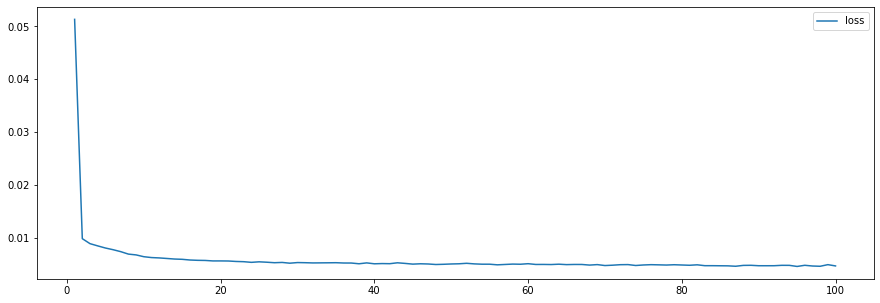

In [28]:
model_df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))
model_df.plot(y = 'loss', figsize = (15,5))

<AxesSubplot:>

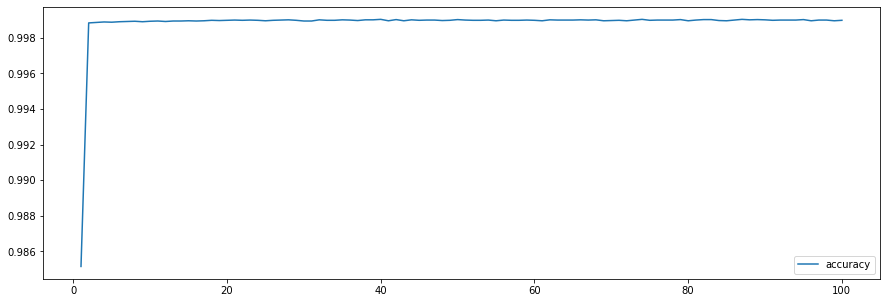

In [29]:
model_df = pd.DataFrame(model.history, index=range(1, len(model.history["accuracy"]) + 1))
model_df.plot(y = 'accuracy', figsize = (15,5))